In [1]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('BTC-USD_day_yfin.csv')

In [73]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [74]:
df1['Price'] = df1['Adj Close']
df2 = df1[['Date','Price']]
df2 = df2.iloc[::-1]

In [75]:
lag = 5
for i in range (1,lag+1):
    df2['price_l'+str(i)] = df2['Price'][i:]
    df2['price_l'+str(i)] = df2['price_l'+str(i)].shift(-i)


In [76]:
df2 = df2.head(len(df2)-lag)

In [77]:
test = df2.head(365)
train = df2.tail(2190-365)
x_test = test.drop(columns = ['Date', 'Price'])
x_train = train.drop(columns = ['Date', 'Price'])
y_test = test['Price']
y_train = train['Price']


In [78]:
from sklearn.ensemble import GradientBoostingRegressor as GBTReg
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

model = GBTReg(loss = 'squared_error')
grid = dict()
grid['n_estimators'] = [10, 100, 200]
grid['learning_rate'] = [0.01, 0.1, 0.3]
grid['max_depth'] = [3, 5, 9, 13]

cv = RepeatedKFold(n_splits=5, n_repeats=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv)
grid_result = grid_search.fit(x_train, y_train)

In [79]:
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [80]:
gbt_reg_best = GBTReg(loss = 'squared_error',learning_rate = 0.1, max_depth = 3, n_estimators = 100)
gbt_reg_best.fit(x_train,y_train)
preds = gbt_reg_best.predict(x_test)

In [81]:
df4 = x_test
df4['Price'] = y_test
df4['Pred'] = preds
df4

,price_l1,price_l2,price_l3,price_l4,price_l5,Price,Pred
2190,42156.902344,42099.402344,42627.855469,43442.855469,42520.402344,42265.187500,41591.225833
2189,42099.402344,42627.855469,43442.855469,42520.402344,43613.140625,42156.902344,41591.225833
2188,42627.855469,43442.855469,42520.402344,43613.140625,43016.117188,42099.402344,42554.817409
2187,43442.855469,42520.402344,43613.140625,43016.117188,43739.542969,42627.855469,42927.921359
2186,42520.402344,43613.140625,43016.117188,43739.542969,43997.902344,43442.855469,42554.817409
...,...,...,...,...,...,...,...
1830,16863.238281,16679.857422,16688.470703,16625.080078,16547.496094,16836.736328,16898.810466
1829,16679.857422,16688.470703,16625.080078,16547.496094,16602.585938,16863.238281,16677.997561
1828,16688.470703,16625.080078,16547.496094,16602.585938,16642.341797,16679.857422,16677.997561
1827,16625.080078,16547.496094,16602.585938,16642.341797,16552.572266,16688.470703,16677.997561


In [82]:
sum((df4['Pred']-df4['Price'])**2)/365


901394.561692624

In [83]:
sum((df4['price_l1']-df4['Price'])**2)/365

430132.64581044327

In [84]:
mae_percent = sum(abs(df4['Pred']-df4['Price'])/df4['Price'])/len(df4)
mae_percent

0.024701918461533284

In [85]:
mae_percent2 = sum(abs(df4['price_l1']-df4['Price'])/df4['Price'])/len(df4)
mae_percent2

0.015177906985802537

In [86]:
df4['Date'] = test['Date']
df4

,price_l1,price_l2,price_l3,price_l4,price_l5,Price,Pred,Date
2190,42156.902344,42099.402344,42627.855469,43442.855469,42520.402344,42265.187500,41591.225833,2023-12-31
2189,42099.402344,42627.855469,43442.855469,42520.402344,43613.140625,42156.902344,41591.225833,2023-12-30
2188,42627.855469,43442.855469,42520.402344,43613.140625,43016.117188,42099.402344,42554.817409,2023-12-29
2187,43442.855469,42520.402344,43613.140625,43016.117188,43739.542969,42627.855469,42927.921359,2023-12-28
2186,42520.402344,43613.140625,43016.117188,43739.542969,43997.902344,43442.855469,42554.817409,2023-12-27
...,...,...,...,...,...,...,...,...
1830,16863.238281,16679.857422,16688.470703,16625.080078,16547.496094,16836.736328,16898.810466,2023-01-05
1829,16679.857422,16688.470703,16625.080078,16547.496094,16602.585938,16863.238281,16677.997561,2023-01-04
1828,16688.470703,16625.080078,16547.496094,16602.585938,16642.341797,16679.857422,16677.997561,2023-01-03
1827,16625.080078,16547.496094,16602.585938,16642.341797,16552.572266,16688.470703,16677.997561,2023-01-02


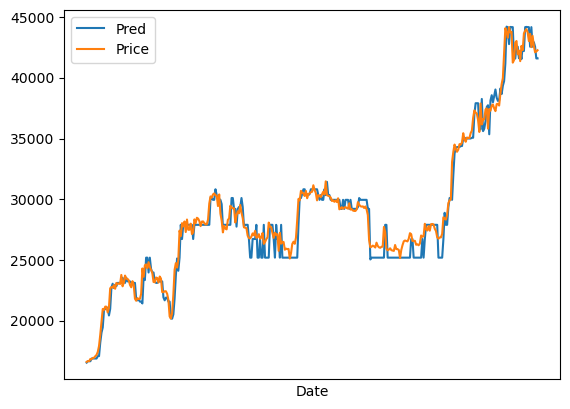

In [87]:
import matplotlib.pyplot as plt
df4 = df4.iloc[::-1]
df4.plot(x="Date", y=["Pred","Price"])
plt.xticks([])
plt.show()

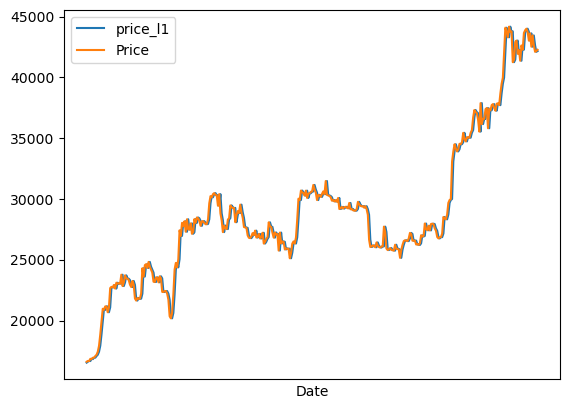

In [88]:
df4.plot(x="Date", y=["price_l1","Price"])
plt.xticks([])
plt.show()